## Loading Library

In [86]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [87]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/valenciamelita/Dataset-DM/refs/heads/main/bread%20basket.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [88]:
#2 info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
#3 check missing values
df.isna().sum()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a _________________________. (fill that blank on the section below)

The overview reveals 20,507 entries and 5 columns: Transaction, Item, date_time, period_day, and weekday_weekend. The Transaction column contains integers identifying unique transactions, while Item contains the names of purchased items as strings. The date_time column stores the timestamp of each transaction, and period_day categorizes the time of day (e.g., morning, afternoon). Lastly, weekday_weekend indicates whether the transaction occurred on a weekday or weekend. All columns have complete data (no missing values). The dataset consumes approximately 801 KB of memory, and the data types include one integer and four object (string) fields.

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-90-3dbb78484f53>:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


(array([17106., 17136., 17167., 17198., 17226., 17257.]),
 [Text(17106.0, 0, '2016-11'),
  Text(17136.0, 0, '2016-12'),
  Text(17167.0, 0, '2017-01'),
  Text(17198.0, 0, '2017-02'),
  Text(17226.0, 0, '2017-03'),
  Text(17257.0, 0, '2017-04')])

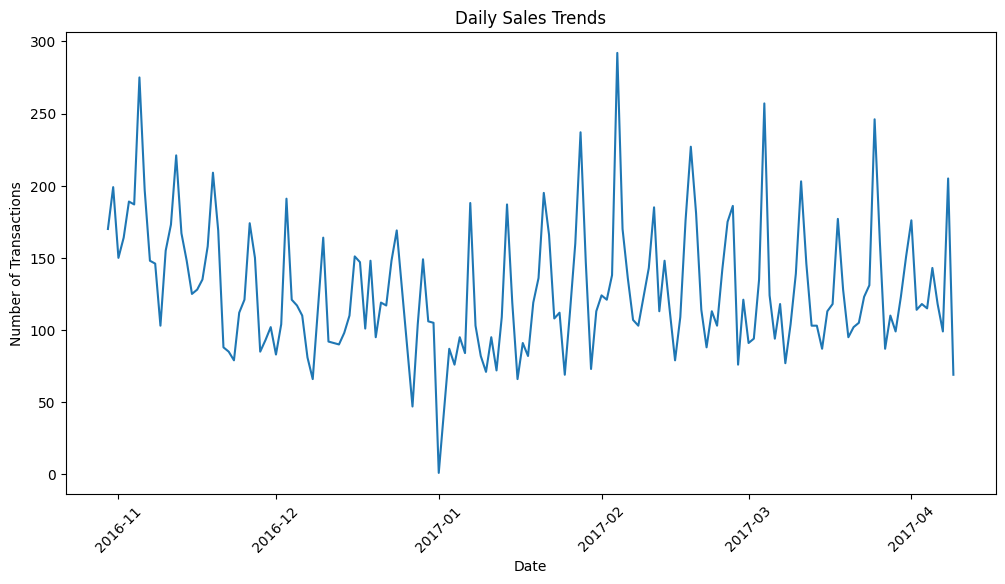

In [90]:
# 5

plt.figure(figsize=(12, 6))
df['date_time'] = pd.to_datetime(df['date_time'])
df['date'] = df['date_time'].dt.date

daily = df.groupby('date').size().reset_index(name='count')

plt.plot(daily['date'], daily['count'])
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Sales Trends')
plt.xticks(rotation=45)



Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [91]:
# 6
df = df.drop(columns=['date'])

df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['time'] = df['date_time'].dt.time
df['hour'] = df['date_time'].dt.hour
df['day_name'] = df['date_time'].dt.day_name()

df.sample(5)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend,day,month,year,time,hour,day_name
20212,9539,Mineral water,2017-04-07 14:50:00,afternoon,weekday,7,4,2017,14:50:00,14,Friday
7522,3795,Toast,2016-12-24 11:10:00,morning,weekend,24,12,2016,11:10:00,11,Saturday
6223,3107,Scandinavian,2016-12-13 16:07:00,afternoon,weekday,13,12,2016,16:07:00,16,Tuesday
12468,6144,Cake,2017-02-06 15:50:00,afternoon,weekday,6,2,2017,15:50:00,15,Monday
10028,5032,Medialuna,2017-01-21 10:14:00,morning,weekend,21,1,2017,10:14:00,10,Saturday



Alright, now I can easily create a visualization of monthly sales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


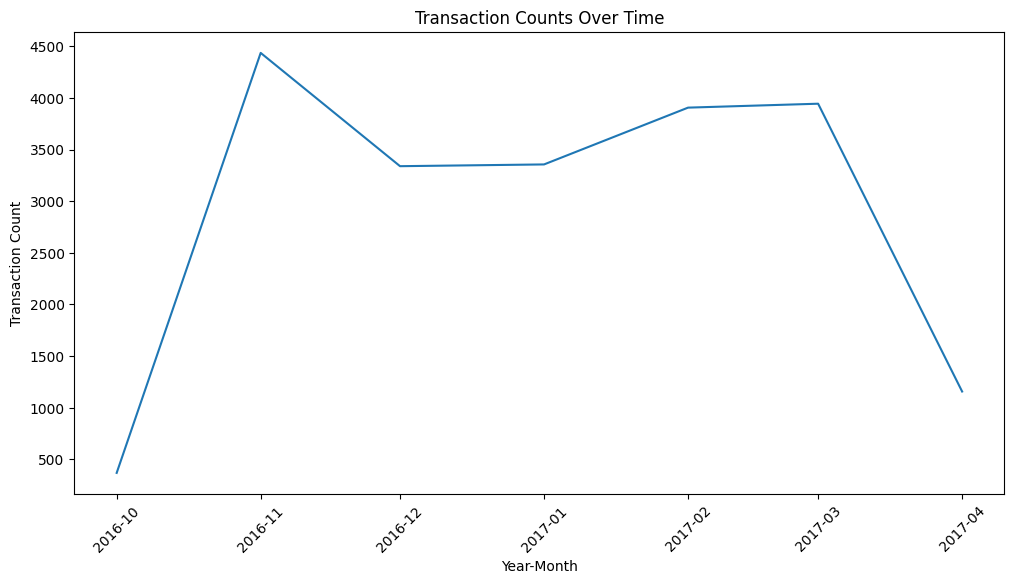

In [92]:
#7
monthly_yearly = df.groupby(['year', 'month'])['Transaction'].count().reset_index(name='count')
monthly_yearly['Year-Month'] = pd.to_datetime(monthly_yearly['year'].astype(str) + '-' + monthly_yearly['month'].astype(str), format='%Y-%m')
monthly_yearly = monthly_yearly.sort_values(by=['Year-Month'])

plt.figure(figsize=(12, 6))
plt.plot(monthly_yearly['Year-Month'], monthly_yearly['count'])
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')
plt.title('Transaction Counts Over Time')
plt.xticks(rotation=45)
plt.show()

8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

The dataset records transactions for items like Coffee, Bread, Coke, and Soup, including information about the date, time, and time of day. The daily sales trend shows ups and downs, reflecting changes in customer activity. Monthly sales also show patterns, with some months having higher sales, possibly due to seasonal or event-related reasons. Looking at these trends helps the business understand when demand is higher or lower.

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [93]:
#9
weekday_names = df.loc[df['weekday_weekend'] == 'weekday', 'day_name'].unique()
print(f"Unique weekday names: {weekday_names}")

# Unique weekend names
weekend_names = df.loc[df['weekday_weekend'] == 'weekend', 'day_name'].unique()
print(f"Unique weekend names: {weekend_names}")

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [94]:
#10
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
aggregation = df.groupby(['month', 'day_name'])['Transaction'].count().unstack(fill_value=0)
aggregation = aggregation.reindex(columns=day_order)
aggregation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is _____

The data shows sales trends for each day of the week across different months. Saturdays consistently have the highest sales, followed by Sundays, indicating that weekends are the busiest times for transactions. Sales tend to be lower on weekdays, especially on Mondays, where sales are typically the lowest. Some months, like Month 3, show a steady increase in sales throughout the week, while others, like Month 10, have very low activity, particularly on weekdays. Overall, the data suggests that weekend sales are significantly higher, and there may be seasonal or event-driven factors affecting monthly trends.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


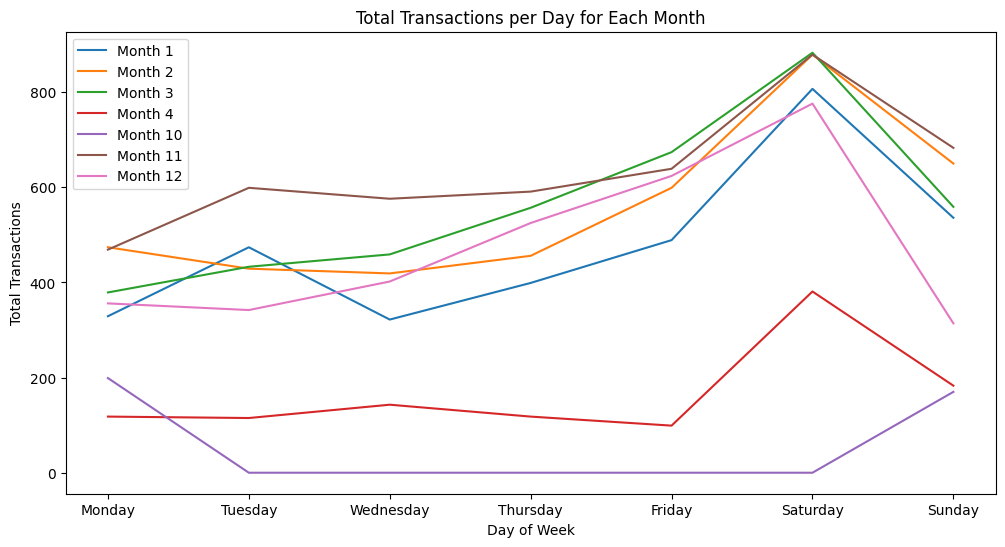

In [95]:
# 12

plt.figure(figsize=(12, 6))
for month in aggregation.index:
    plt.plot(aggregation.columns, aggregation.loc[month], label=f'Month {month}')

plt.xlabel('Day of Week')
plt.ylabel('Total Transactions')
plt.title('Total Transactions per Day for Each Month')
plt.legend()


13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.

The sales trend shows variations in total transactions across days of the week for different months. Across all months, Saturday consistently sees the highest number of transactions, indicating a peak in customer activity, likely due to weekend shopping habits. Fridays and Sundays also show relatively high activity, though slightly lower than Saturdays. Transactions during weekdays, particularly Tuesday and Wednesday, are generally lower, suggesting less shopping activity midweek. The trends vary slightly between months, with some months (like Month 4) showing steady growth from midweek to the weekend, while others (like Month 10) have more consistent sales throughout. These insights could inform promotional strategies to maximize weekend sales while encouraging weekday engagement.

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [96]:
# 14
df['period_day'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [97]:
# 15
morning_hours = df.loc[df['period_day'] == 'morning', 'hour'].unique()
afternoon_hours = df.loc[df['period_day'] == 'afternoon', 'hour'].unique()
evening_hours = df.loc[df['period_day'] == 'evening', 'hour'].unique()
night_hours = df.loc[df['period_day'] == 'night', 'hour'].unique()

print(f"Unique Morning hours: {morning_hours}")
print(f"Unique Afternoon hours: {afternoon_hours}")
print(f"Unique Evening hours: {evening_hours}")
print(f"Unique Night hours: {night_hours}")

Unique Morning hours: [ 9 10 11  8  7  1]
Unique Afternoon hours: [12 13 14 15 16]
Unique Evening hours: [17 18 19 20]
Unique Night hours: [21 23 22]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

I noticed something unusual in the results – the "morning" hours include times like 1, which doesn't match the usual definition of morning hours (typically between 6 AM and 11 AM). The inclusion of 1 AM in the morning period might be due to an error in how the data was categorized or entered, or a mistake in defining the hours for each time period. To fix this, it would be helpful to check how the data is categorized or clean the data to make sure each hour is assigned to the correct time period.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


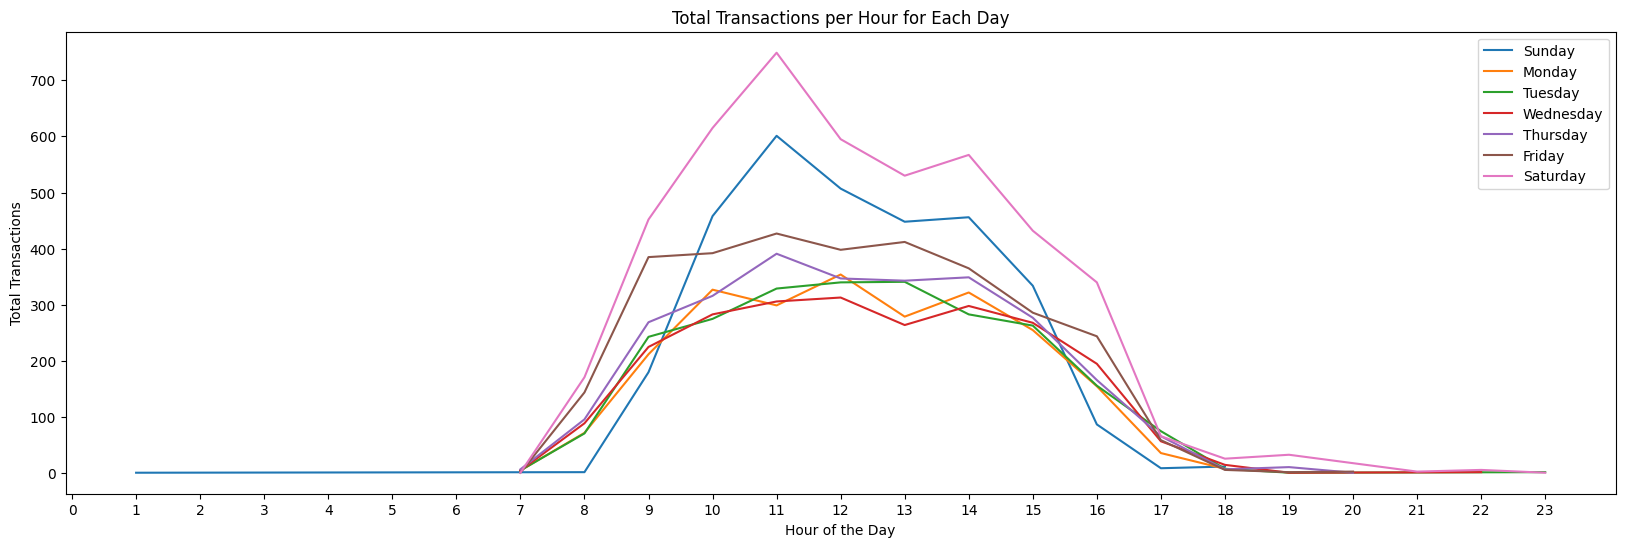

In [98]:
# 17
plt.figure(figsize=(20, 6))
for day in df['day_name'].unique():
    day_data = df[df['day_name'] == day]
    plt.plot(day_data['hour'].value_counts().sort_index().index, day_data['hour'].value_counts().sort_index().values, label=day)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Transactions')
plt.title('Total Transactions per Hour for Each Day')
plt.legend()
plt.xticks(range(24))
plt.show()

18. The daily sales trend plot reveals that _______

The daily sales trend plot reveals that transaction activity starts to increase around 7 AM and peaks between 10 AM and 12 PM across all days, indicating that mornings are the busiest times for sales. Saturdays exhibit the highest transaction volume during the peak hours, likely due to increased weekend shopping. After 1 PM, there is a gradual decline in transactions, with activity tapering off significantly by the evening (around 6 PM) and remaining minimal through the night. This pattern suggests a business model or customer behavior focused on morning activity, such as breakfast or coffee-related sales, and limited evening operations.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


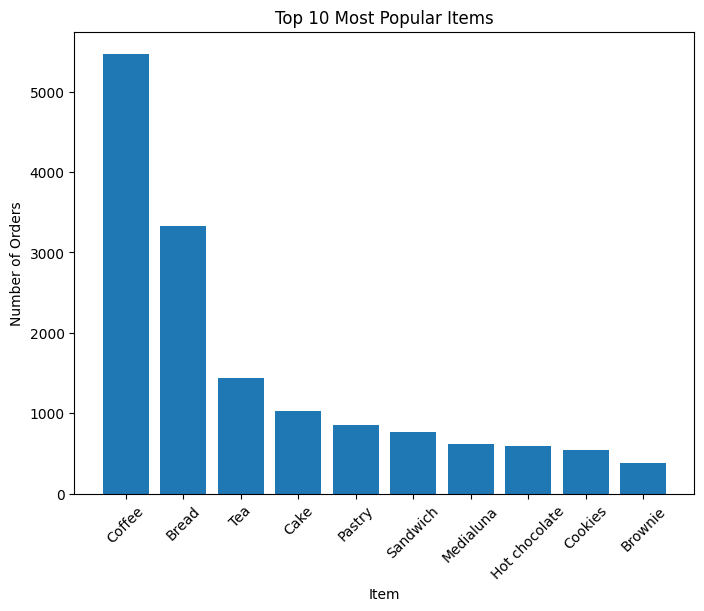

In [99]:
# 19
plt.figure(figsize=(8, 6))
item_counts = df['Item'].value_counts().head(10)
plt.bar(item_counts.index, item_counts.values)
plt.xlabel('Item')
plt.ylabel('Number of Orders')
plt.title('Top 10 Most Popular Items')
plt.xticks(rotation=45)
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


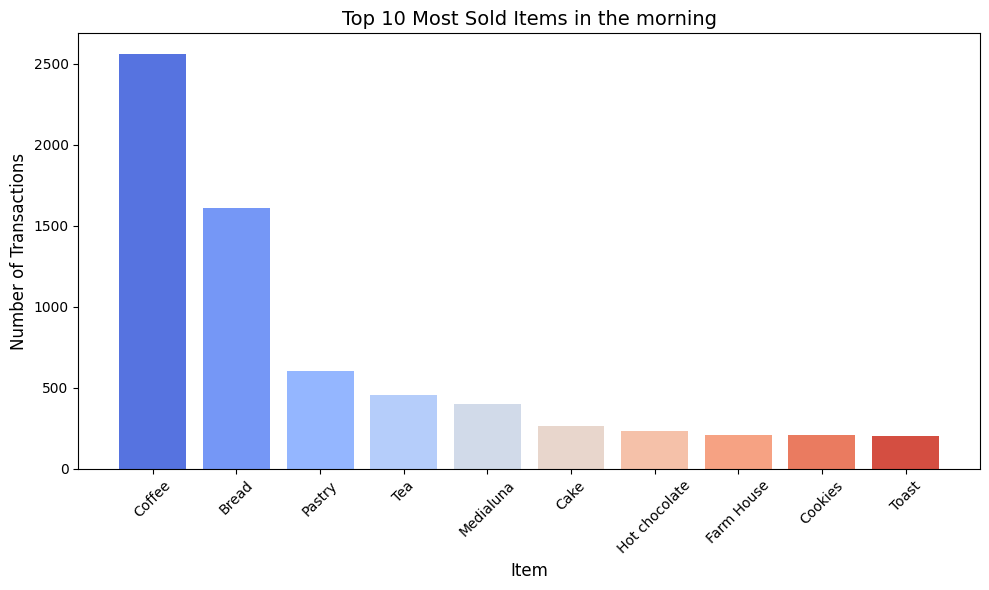

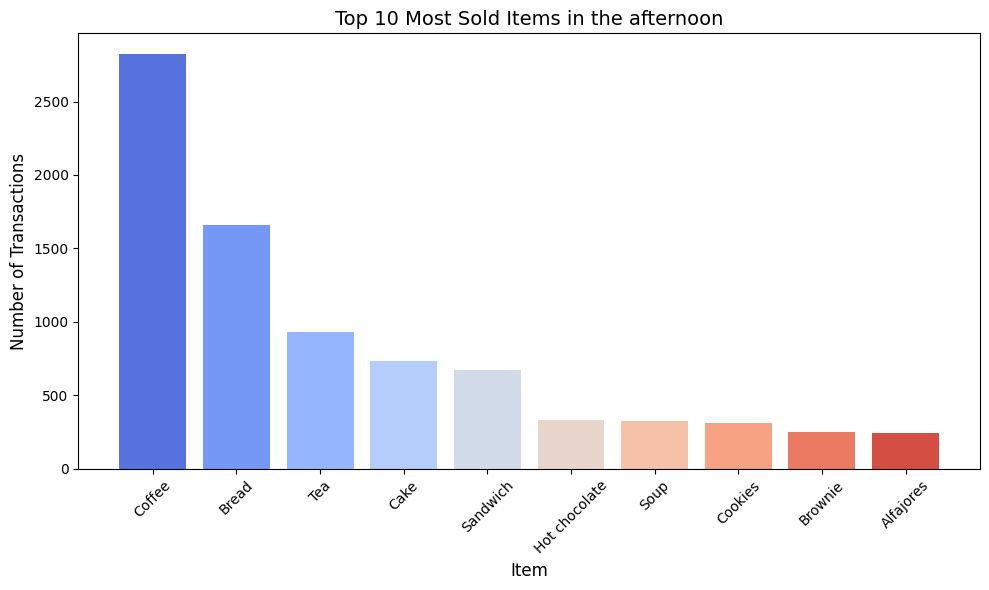

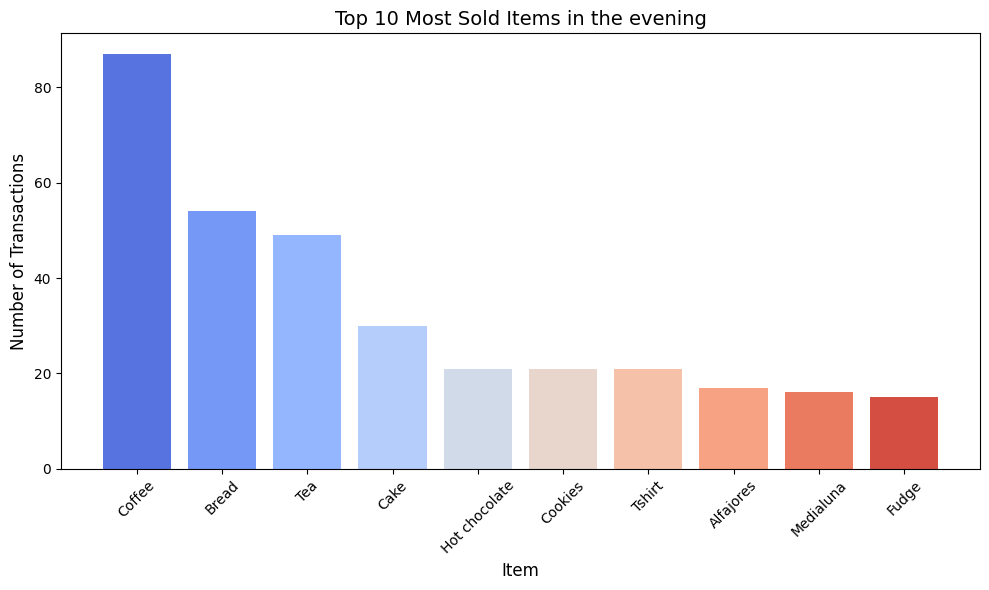

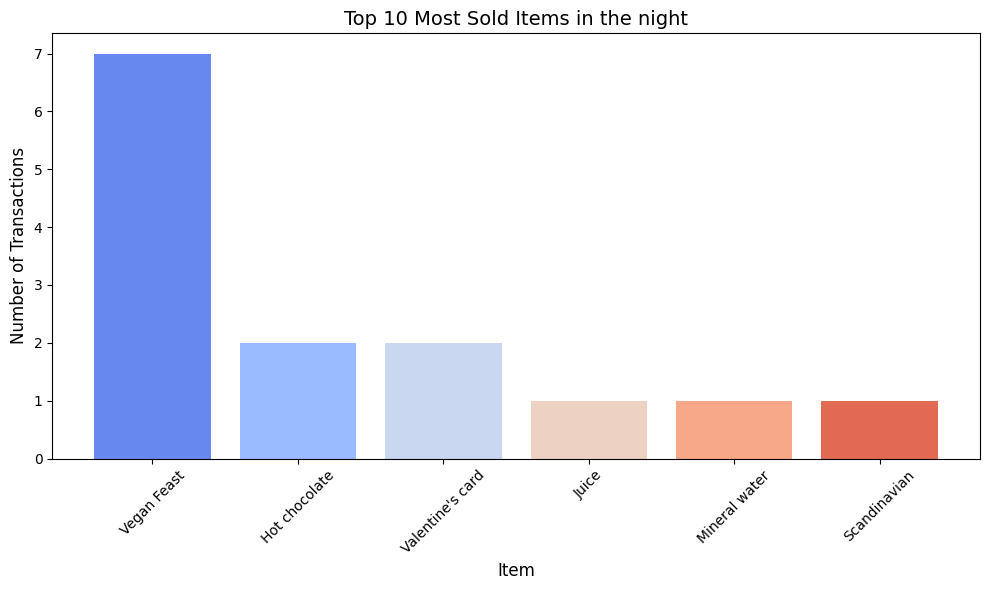

In [100]:
# 20

import seaborn as sns

for period in df['period_day'].unique():
    period_data = df[df['period_day'] == period]
    item_counts = period_data['Item'].value_counts().head(10)

    # Create the plot
    plt.figure(figsize=(10, 6))
    colors = sns.color_palette("coolwarm", len(item_counts))  # Use a gradient color palette
    plt.bar(item_counts.index, item_counts.values, color=colors)
    plt.xlabel('Item', fontsize=12)
    plt.ylabel('Number of Transactions', fontsize=12)
    plt.title(f'Top 10 Most Sold Items in the {period}', fontsize=14)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)

    # Show the chart
    plt.tight_layout()
    plt.show()


21. It turns out that there is something different in the plot above, the insight is ____


Customer preferences throughout the day, influencing which products are most popular. Coffee emerges as a consistent bestseller across all periods, highlighting its crucial role in the bakery's offerings. In the morning, breakfast staples like Bread and Pastry are in high demand, alongside Coffee. As the day transitions to the afternoon, Cake, Sandwich, and Tea gain traction, likely reflecting a shift towards lunch and snack choices. While Bread and Coffee maintain popularity in the evening and night, overall transaction volume decreases, suggesting a focus on essential items and reduced customer traffic. These insights suggest that the bakery should prioritize Coffee throughout the day, adjust its offerings to cater to breakfast, lunch, and snack preferences, and potentially consider promotional strategies to drive sales during slower periods.



I found a valentine card, I was curious about when people bought it so I made a visualization of it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


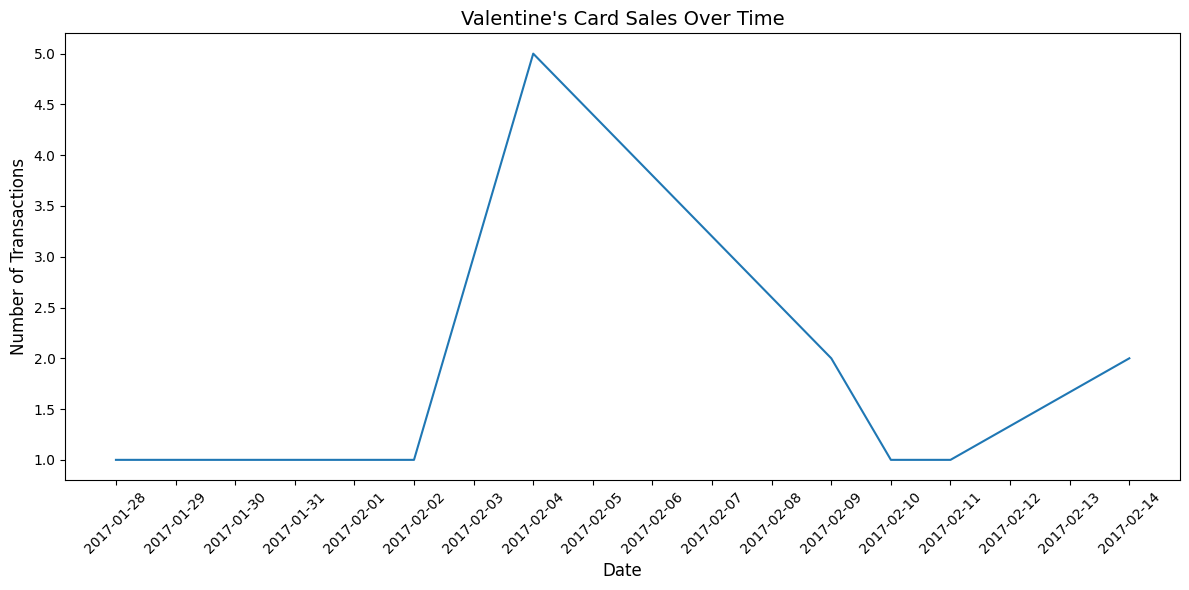

In [101]:
#22

import matplotlib.pyplot as plt

# Filter for Valentine's card sales
val_card = df[df['Item'] == "Valentine's card"]

# Aggregate transactions by date
val_card_sales = val_card['date_time'].dt.date.value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(val_card_sales.index, val_card_sales.values)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.title("Valentine's Card Sales Over Time", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.tight_layout()
plt.show()


23. I found the insight from the sale of the Valentine's cards above is ____


This graph shows the number of Valentine's card sales over time, spanning from late January to mid-February 2017. It shows a clear spike in sales around February 14th, Valentine's Day, indicating a significant increase in demand for Valentine's cards leading up to and on the holiday itself. Before and after Valentine's Day, sales are relatively low, suggesting that the majority of Valentine's card purchases are concentrated around this specific date. This pattern aligns with the expected seasonal trend for Valentine's Day-related products.

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [102]:
# 24
transactions = df.groupby(['Transaction', 'Item'])['Item'].count().unstack().fillna(0)
transactions = transactions.applymap(lambda x: 1 if x > 0.0 else 0.0)
transactions.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-102-8e1876fe9514>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transactions = transactions.applymap(lambda x: 1 if x > 0.0 else 0.0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
#25

# Convert quantities to 1 and 0
transactions = df.groupby(['Transaction', 'Item'])['Item'].count().unstack().fillna(0)
transactions = transactions.applymap(lambda x: 1 if x > 0 else 0)
transactions.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-103-e6f8560be2f1>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transactions = transactions.applymap(lambda x: 1 if x > 0 else 0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [104]:
# 26
frequencies = apriori(transactions, min_support=0.02, use_colnames=True)
frequencies

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [105]:
# 27
result = association_rules(frequencies, metric="lift", min_threshold=1)

result.sample(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,(Coffee),(Juice),0.478394,0.038563,0.020602,0.043065,1.116750,0.002154,1.004705,0.200428
15,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
8,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048
19,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699,0.615122
17,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
18,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
7,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
2,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
16,(Coffee),(Sandwich),0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807,0.194321


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



The data shows how certain products are commonly bought together by customers. For example, Coffee is often paired with Cookies, Pastries, Cake, and Sandwiches, making it a popular choice with baked goods. There’s also a strong connection between Cake and Tea, as well as Pastry and Bread, meaning these items are frequently purchased together. Combinations like Coffee with Toast or Coffee with Sandwiches are especially common, showing that customers are likely to buy these items as a pair. Overall, promoting these popular combinations could be a great way to encourage customers to buy more items together.